# Laboratorio 7
## Predicci√≥n de Diabetes con AutoGluon ü©∫üíª

~ Samuel Chamale 21885

~ Adrian Rodriguez 21691

> *Repositorio : https://github.com/UVG-Works-Hub/autogluon-diabetes-prediction* 

### Descripci√≥n

El objetivo de este ejercicio es construir, entrenar y probar un modelo clasificador para predecir diabetes en pacientes usando **AutoGluon**. Esta herramienta podr√≠a ser utilizada de manera efectiva por profesionales de la salud para detectar diabetes y entender los factores clave que contribuyen a la enfermedad.


---

### 1. Carga del Conjunto de Datos üì•

In [8]:
# Importar librer√≠as necesarias
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv('diabetes.csv')

# Mostrar las primeras filas del DataFrame
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

---

### 2. An√°lisis Exploratorio de Datos (EDA) üîç

#### a) Estad√≠sticas Descriptivas üìä

**Obtenga estad√≠sticas descriptivas b√°sicas del conjunto de datos.**

In [9]:
# Obtener estad√≠sticas descriptivas
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

*Comentario*: Esto nos proporciona informaci√≥n sobre la media, desviaci√≥n est√°ndar, valores m√≠nimos y m√°ximos, y percentiles de cada variable.

1. **Pregnancies (Embarazos):**
   - La media es de 3.84 embarazos, y la distribuci√≥n var√≠a de 0 a 17. 
   - Esto sugiere que hay pacientes que no han tenido embarazos, lo cual es posible y esperado en el caso de mujeres j√≥venes o aquellas con diabetes tipo 1.

2. **Glucose (Glucosa):**
   - La media es de 120.89, con un rango de 0 a 199.
   - **¬°Atenci√≥n!**: El valor m√≠nimo es 0, lo cual no es realista ya que la glucosa en sangre nunca deber√≠a ser 0 en un ser humano vivo. Esto sugiere la presencia de posibles valores faltantes codificados como 0. Estos valores at√≠picos deber√°n ser tratados posteriormente.

3. **BloodPressure (Presi√≥n Arterial):**
   - La media es de 69.1, con valores entre 0 y 122.
   - **Nota:** El valor m√≠nimo es 0, lo que nuevamente no es realista para la presi√≥n arterial humana. Esto indica posibles errores de entrada o datos faltantes que podr√≠an estar codificados como 0.

4. **SkinThickness (Grosor de Piel):**
   - La media es de 20.53, y los valores var√≠an de 0 a 99.
   - Los valores de 0 pueden indicar datos faltantes o no registrados, ya que el grosor del pliegue cut√°neo generalmente no deber√≠a ser 0. Deber√≠amos decidir c√≥mo tratar estos valores antes del modelado.

5. **Insulin (Insulina):**
   - La media es de 79.8, con valores que oscilan entre 0 y 846.
   - **Observaci√≥n:** Un valor de 0 para la insulina probablemente indica datos faltantes, ya que es poco probable que los niveles de insulina en sangre sean realmente 0. 

6. **BMI (√çndice de Masa Corporal):**
   - La media del BMI es 31.99, con un rango de 0 a 67.1.
   - **Nota importante:** Un BMI de 0 no es posible y sugiere datos faltantes o errores de entrada.

7. **DiabetesPedigreeFunction (Funci√≥n de Pedigr√≠ de Diabetes):**
   - La media es 0.4718 y var√≠a entre 0.078 y 2.42.
   - No parece haber valores at√≠picos evidentes en esta variable, lo cual es positivo.

8. **Age (Edad):**
   - La edad promedio es de 33.24 a√±os, con un rango de 21 a 81 a√±os.
   - La distribuci√≥n parece razonable para un estudio de diabetes.

9. **Outcome (Resultado):**
   - Esta es nuestra variable objetivo, indicando si el paciente tiene diabetes (1) o no (0). La media de 0.3489 indica que aproximadamente el 34.9% de los pacientes en este conjunto de datos tienen diabetes.

**Observaciones Generales** üìå

- Vemos que algunas variables como *Glucose*, *BloodPressure*, *SkinThickness*, *Insulin* y *BMI* tienen valores m√≠nimos de 0, lo cual no es realista en un contexto m√©dico. Esto sugiere que los ceros podr√≠an representar valores faltantes en lugar de valores v√°lidos. A√∫n as√≠, no podemos dicidir quitarlos como tal al desconocer el contexto del conjunto de datos.
- Estos valores an√≥malos deben ser tratados antes de entrenar el modelo, ya sea imputando datos (rellenar con la media, la mediana, etc.) o eliminando las filas afectadas.
- Es crucial manejar los valores at√≠picos y faltantes adecuadamente para evitar que afecten negativamente el rendimiento del modelo de clasificaci√≥n.

#### b) Visualizaci√≥n de la Distribuci√≥n de las Variables üìà

**Visualice la distribuci√≥n de las variables.**

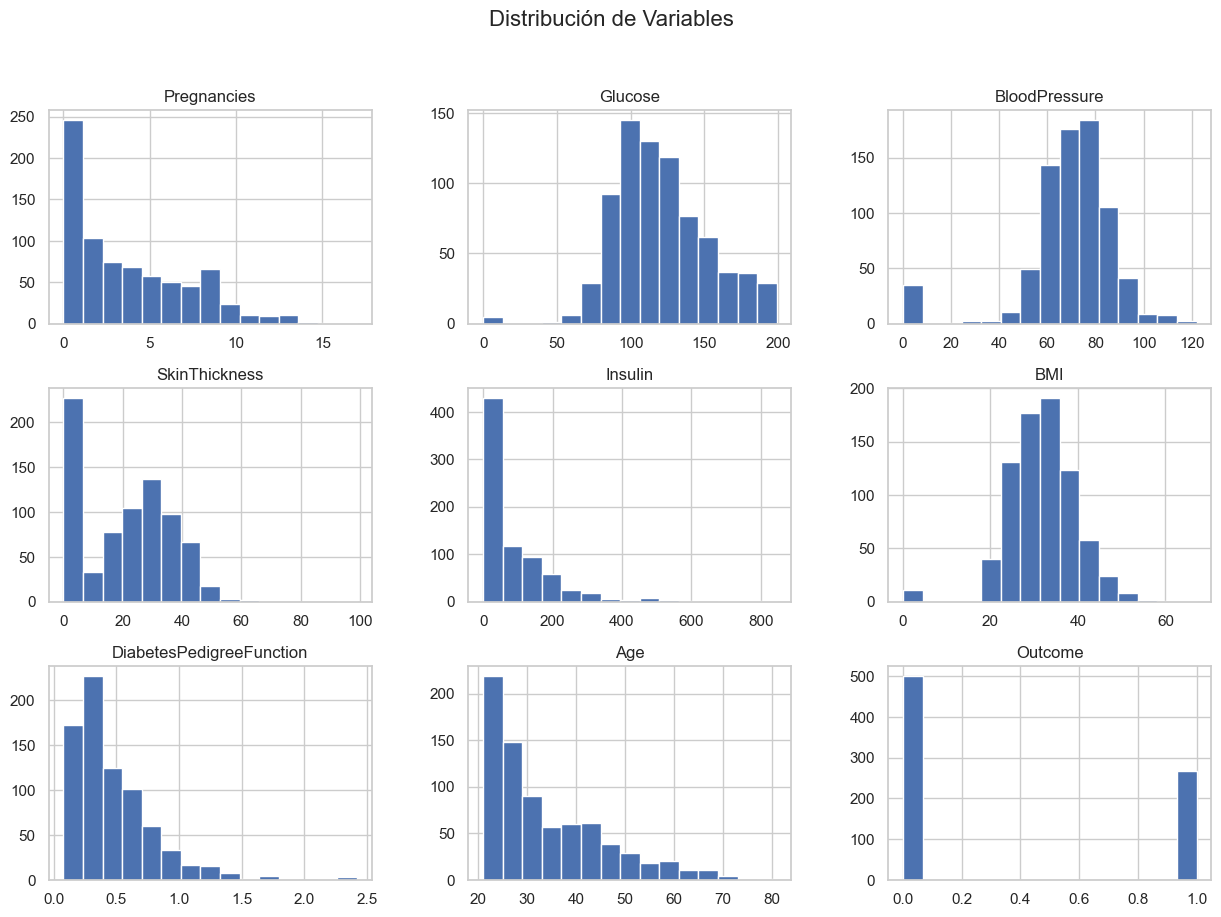

In [10]:
# Importar librer√≠as de visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gr√°ficos
sns.set(style="whitegrid")

# Crear histogramas para cada variable
df.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Distribuci√≥n de Variables", fontsize=16)
plt.show()

*Comentario*: Los histogramas nos ayudan a entender la distribuci√≥n y detectar posibles sesgos o anomal√≠as en los datos.

1. **Pregnancies (Embarazos):**
   - La mayor√≠a de los pacientes tienen entre 0 y 5 embarazos. Sin embargo, hay unos pocos casos con un n√∫mero de embarazos significativamente alto (> 10), lo que podr√≠a ser considerado un valor at√≠pico.
   - La distribuci√≥n est√° sesgada hacia la izquierda, con muchos valores bajos.

2. **Glucose (Glucosa):**
   - La distribuci√≥n es aproximadamente normal, pero con una cantidad notable de valores bajos, algunos de los cuales son 0.
   - Los valores de 0 no son realistas y probablemente representan datos faltantes o no registrados, lo cual ser√° necesario abordar m√°s adelante.

3. **BloodPressure (Presi√≥n Arterial):**
   - La mayor√≠a de los valores se concentran entre 60 y 90. La forma general sugiere una distribuci√≥n aproximadamente normal.
   - Existen algunos valores de 0, lo cual no es fisiol√≥gicamente posible y se√±ala la presencia de posibles datos faltantes.

4. **SkinThickness (Grosor de Piel):**
   - Hay una gran cantidad de valores en 0, lo cual es sospechoso, ya que el grosor del pliegue cut√°neo normalmente no deber√≠a ser cero.
   - La distribuci√≥n muestra una concentraci√≥n de valores entre 10 y 40, con algunos valores altos que podr√≠an ser at√≠picos.

5. **Insulin (Insulina):**
   - La mayor√≠a de los valores est√°n cerca de 0, lo cual es problem√°tico, ya que sugiere que hay muchos valores faltantes o no medidos.
   - Adem√°s, la distribuci√≥n es altamente sesgada a la derecha, con unos pocos valores extremadamente altos (> 600) que pueden ser considerados como outliers.

6. **BMI (√çndice de Masa Corporal):**
   - La distribuci√≥n del BMI se asemeja a una curva normal, con la mayor√≠a de los valores concentrados entre 20 y 40.
   - Hay una cantidad de valores en 0, lo cual no es posible en un contexto real y sugiere la presencia de datos faltantes.

7. **DiabetesPedigreeFunction (Funci√≥n de Pedigr√≠ de Diabetes):**
   - La mayor√≠a de los valores son bajos, distribuy√©ndose principalmente entre 0 y 1.
   - Hay algunos valores altos (> 1.5) que son menos comunes y podr√≠an ser considerados como valores extremos.

8. **Age (Edad):**
   - La mayor√≠a de los pacientes tienen entre 20 y 40 a√±os, con un descenso gradual en la frecuencia para edades m√°s avanzadas.
   - La distribuci√≥n es asim√©trica, con un sesgo hacia la derecha.

9. **Outcome (Resultado):**
   - Esta variable es binaria, con valores de 0 y 1.
   - Hay m√°s pacientes etiquetados con 0 (sin diabetes) que con 1 (con diabetes). Esto indica un posible desbalance de clases, lo que podr√≠a afectar el rendimiento del modelo de clasificaci√≥n.

**Observaciones Generales üìù**

- Las variables **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin** y **BMI** contienen valores de 0 que no son realistas y probablemente representan datos faltantes. A√∫n as√≠, no podemos dicidir quitarlos como tal al desconocer el contexto del conjunto de datos.
- La mayor√≠a de las variables tienen distribuciones sesgadas, lo que podr√≠a requerir transformaciones o ajustes durante el preprocesamiento de los datos.
- La variable objetivo (**Outcome**) est√° desbalanceada, lo que podr√≠a requerir t√©cnicas especiales durante el entrenamiento del modelo para manejar este desbalance.


#### c) Valores Nulos o At√≠picos ‚ö†Ô∏è

**Verifique la presencia de valores nulos o at√≠picos y decida c√≥mo manejarlos.**


Valores nulos en cada columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


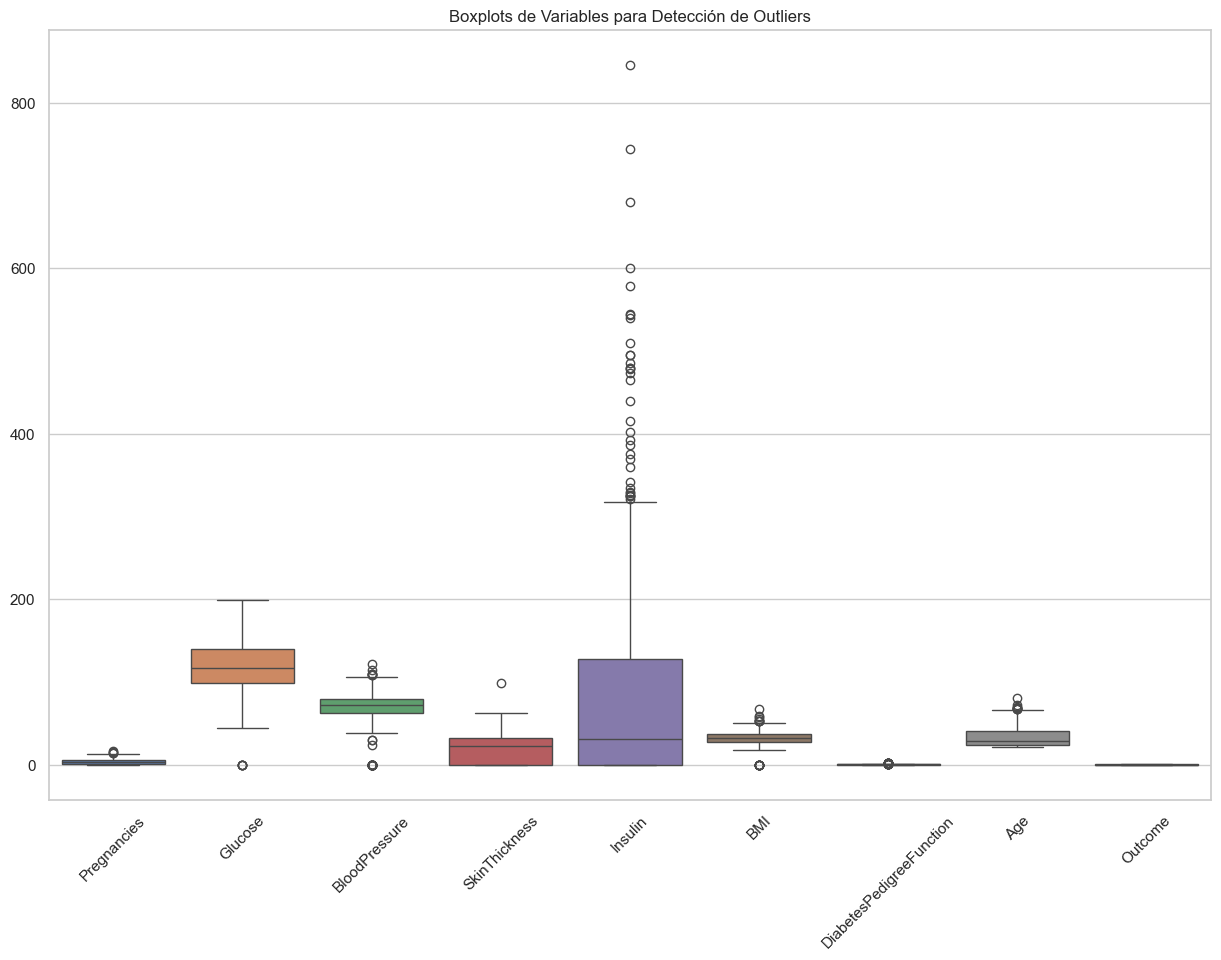

In [11]:
# Verificar valores nulos
print("Valores nulos en cada columna:")
print(df.isnull().sum())

# Detectar valores at√≠picos con boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Boxplots de Variables para Detecci√≥n de Outliers")
plt.xticks(rotation=45)
plt.show()

*Comentario*: No hay valores nulos en el conjunto de datos, pero los boxplots indican la presencia de valores at√≠picos en algunas variables.

**An√°lisis de Outliers con Boxplots üì¶**

- **Pregnancies (Embarazos):** Hay algunos valores at√≠picos en la parte superior, lo que indica que hay pacientes con un n√∫mero de embarazos significativamente mayor al promedio.

- **Glucose (Glucosa):** Aunque no hay valores at√≠picos extremos, el rango de la glucosa se extiende bastante, y algunos valores bajos cercanos a 0 son sospechosos y podr√≠an indicar datos faltantes.

- **BloodPressure (Presi√≥n Arterial):** Se observan algunos outliers en valores bajos. Al igual que con la glucosa, estos valores podr√≠an representar datos faltantes, ya que la presi√≥n arterial humana no deber√≠a ser 0.

- **SkinThickness (Grosor de Piel):** Presenta varios valores at√≠picos hacia los valores m√°s altos. Adem√°s, la presencia de m√∫ltiples valores en 0 en la parte inferior del gr√°fico indica que muchos datos est√°n posiblemente faltantes.

- **Insulin (Insulina):** La variable *Insulin* muestra una gran cantidad de valores at√≠picos, especialmente en el rango superior (por encima de 200). Adem√°s, muchos valores cercanos a 0 podr√≠an representar datos faltantes. Este patr√≥n es t√≠pico en datos de salud, donde las mediciones de insulina pueden no estar disponibles para todos los pacientes.

- **BMI (√çndice de Masa Corporal):** La mayor√≠a de los valores se encuentran dentro de un rango razonable, pero algunos valores extremadamente bajos (incluyendo 0) y algunos valores altos podr√≠an ser considerados at√≠picos.

- **DiabetesPedigreeFunction:** Aunque presenta algunos valores at√≠picos en la parte superior, la mayor√≠a de los valores se encuentran dentro de un rango plausible.

- **Age (Edad):** Algunos outliers est√°n presentes en la parte superior, lo que indica la presencia de pacientes mayores. Esto es esperable y no necesariamente indica un error en los datos.


**Manejo de Valores At√≠picos**

Decidimos manejar los valores at√≠picos utilizando el m√©todo del rango intercuart√≠lico (IQR).

In [12]:
# Funci√≥n para eliminar outliers
def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_filtrado = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return df_filtrado

# Aplicar la funci√≥n a las columnas num√©ricas
columnas_numericas = df.columns.drop('Outcome')
for columna in columnas_numericas:
    df = eliminar_outliers(df, columna)

# Verificar el nuevo tama√±o del DataFrame
print("Tama√±o del DataFrame despu√©s de eliminar outliers:", df.shape)

Tama√±o del DataFrame despu√©s de eliminar outliers: (636, 9)


*Comentario*: Al eliminar los valores at√≠picos, mejoramos la calidad de los datos para el entrenamiento del modelo.

---

### 3. Entrenamiento con AutoGluon üöÄ

**Utilice la opci√≥n `best_quality` del par√°metro ‚Äúpreset‚Äù y la m√©trica `accuracy`.**

**Entrene varios modelos de clasificaci√≥n con AutoGluon para predecir la columna "Outcome".**

*Nota*: Para instalar AutoGluon se sugiere ver la siguiente gu√≠a. Como recomendaci√≥n personal sugerimos utilizar Conda. https://auto.gluon.ai/dev/install.html

In [13]:
from autogluon.tabular import TabularPredictor

# Definir la variable objetivo
objetivo = 'Outcome'

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Entrenar el modelo con AutoGluon
predictor = TabularPredictor(label=objetivo, eval_metric='accuracy').fit(
    train_data=train_data,
    presets='best_quality'
)

c:\Users\chama\.conda\envs\ag\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No path specified. Models will be saved in: "AutogluonModels\ag-20241004_233449"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.15
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          16
Memory Avail:       2.37 GB / 15.42 GB (15.4%)
Disk Space Avail:   235.94 GB / 476.07 GB (49.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will t

*Comentario*: AutoGluon automatiza el proceso de entrenamiento y selecci√≥n de modelos, permitiendo enfocarnos en la interpretaci√≥n de resultados.

---

### 4. Evaluaci√≥n del Modelo üìù

#### a) Tabla de Mejores Modelos

**Despliegue una tabla de los mejores modelos en funci√≥n de la precisi√≥n y destaque el mejor modelo.**

In [14]:
# Obtener la tabla de l√≠deres
leaderboard = predictor.leaderboard(test_data, silent=True)
leaderboard

model  score_test  score_val eval_metric  \
0             XGBoost_r95_BAG_L1    0.804688   0.812992    accuracy   
1            CatBoost_r12_BAG_L1    0.781250   0.822835    accuracy   
2           CatBoost_r198_BAG_L1    0.781250   0.820866    accuracy   
3           LightGBM_r161_BAG_L1    0.781250   0.824803    accuracy   
4             CatBoost_r6_BAG_L1    0.773438   0.832677    accuracy   
..                           ...         ...        ...         ...   
106   NeuralNetFastAI_r65_BAG_L1    0.718750   0.818898    accuracy   
107   NeuralNetFastAI_r37_BAG_L1    0.710938   0.834646    accuracy   
108  NeuralNetFastAI_r194_BAG_L1    0.703125   0.807087    accuracy   
109  NeuralNetFastAI_r172_BAG_L1    0.703125   0.820866    accuracy   
110  NeuralNetFastAI_r187_BAG_L1    0.695312   0.811024    accuracy   

     pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  \
0          0.267484       0.021054   3.440799                 0.267484   
1          0.092258       0.008202   6.884800                 0.092258   
2          0.093049       0.008104   5.724799                 0.093049   
3          0.155752       0.035653   5.629738                 0.155752   
4          0.086608       0.008410   6.124517                 0.086608   
..              ...            ...        ...                      ...   
106        0.314100       0.093680  28.987992                 0.314100   
107        0.370023       0.095233  36.653389                 0.370023   
108        0.277050       0.059154   3.892137                 0.277050   
109        0.363090       0.080194  25.287709                 0.363090   
110        0.335885       0.084593  26.169988                 0.335885   

     pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                  0.021054           3.440799            1       True   
1                  0.008202           6.884800            1       True   
2                  0.008104           5.724799            1       True   
3                  0.035653           5.629738            1       True   
4                  0.008410           6.124517            1       True   
..                      ...                ...          ...        ...   
106                0.093680          28.987992            1       True   
107                0.095233          36.653389            1       True   
108                0.059154           3.892137            1       True   
109                0.080194          25.287709            1       True   
110                0.084593          26.169988            1       True   

     fit_order  
0          106  
1           96  
2          103  
3           40  
4           85  
..         ...  
106         67  
107         53  
108         95  
109         88  
110        104  

[111 rows x 13 columns]

*Comentario*: La tabla muestra los modelos ordenados por su desempe√±o en la m√©trica de precisi√≥n.

**Observaciones y An√°lisis üìä**

- El modelo con la mejor precisi√≥n en el conjunto de prueba es **XGBoost_r95_BAG_L1** con una precisi√≥n (`score_test`) de **0.8047**. Tambi√©n muestra un buen desempe√±o en el conjunto de validaci√≥n (`score_val` = 0.8129).
- Varios modelos *CatBoost* presentan una precisi√≥n ligeramente menor pero a√∫n competitiva. Por ejemplo, **CatBoost_r12_BAG_L1** tiene un `score_val` de **0.8228** y un `score_test` de **0.7812**, mostrando que puede generalizar bien.
- Los modelos basados en redes neuronales (*NeuralNetFastAI*) presentan tiempos de entrenamiento (*fit_time*) m√°s largos y precisiones m√°s bajas en comparaci√≥n con los modelos basados en √°rboles (como *XGBoost* y *CatBoost*).
- **Tiempos de Predicci√≥n**: Aunque algunos modelos como *NeuralNetFastAI* tienen tiempos de predicci√≥n m√°s altos (`pred_time_test` y `pred_time_val`), otros como *CatBoost* ofrecen tiempos de predicci√≥n significativamente m√°s bajos, lo que puede ser una ventaja en aplicaciones que requieren decisiones r√°pidas, en este caso solo es una nota al pi√© pues no planeamos hacer nada con los modelos.


#### b) Matriz de Confusi√≥n

**Visualice la matriz de confusi√≥n del mejor modelo.**

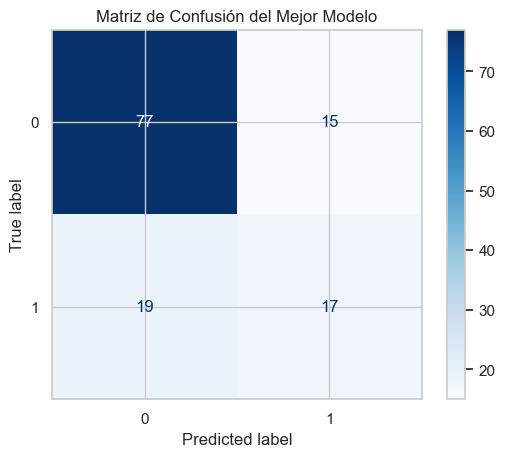

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Realizar predicciones en el conjunto de prueba
y_true = test_data[objetivo]
y_pred = predictor.predict(test_data.drop(columns=[objetivo]))

# Generar la matriz de confusi√≥n
cm = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusi√≥n
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusi√≥n del Mejor Modelo")
plt.show()

*Comentario*: La matriz de confusi√≥n nos permite evaluar el rendimiento del modelo en t√©rminos de verdaderos y falsos positivos y negativos.

**Valores en la Matriz**

- **Verdaderos Negativos (77 en la celda superior izquierda):** El modelo predijo correctamente a 77 pacientes como "sin diabetes" (clase 0) cuando realmente no ten√≠an diabetes. Este es el tipo de predicci√≥n m√°s com√∫n en este caso, lo que refleja la tendencia del conjunto de datos donde hay m√°s pacientes sin diabetes.

- **Falsos Positivos (15 en la celda superior derecha):** El modelo predijo "con diabetes" para 15 pacientes que en realidad no ten√≠an diabetes. Estos son casos donde el modelo podr√≠a estar sobreestimando la presencia de diabetes.

- **Falsos Negativos (19 en la celda inferior izquierda):** El modelo predijo "sin diabetes" para 19 pacientes que realmente ten√≠an diabetes. Este tipo de error es m√°s cr√≠tico en un contexto cl√≠nico, ya que implica no detectar la presencia de la enfermedad.

- **Verdaderos Positivos (17 en la celda inferior derecha):** El modelo identific√≥ correctamente a 17 pacientes como "con diabetes".


En general, aunque el modelo presenta un buen desempe√±o en t√©rminos de precisi√≥n general, hay margen para mejoras, especialmente en la detecci√≥n correcta de pacientes con diabetes.

---

### 5. Reflexi√≥n üí≠

Al trabajar con AutoGluon, hemos experimentado de primera mano c√≥mo las herramientas de AutoML pueden acelerar en demas√≠a el proceso de desarrollo de modelos competentes.

A continuaci√≥n destacaremos algunas de las ventajas y desventajas que hemos descubierto:

**Ventajas de AutoGluon y AutoML:**

- **Eficiencia de Tiempo**: Automatiza tareas repetitivas, permitiendo enfocarse en an√°lisis de resultados.
- **Facilidad de Uso**: Reduce la barrera de entrada para usuarios con menos experiencia t√©cnica.
- **Optimizaci√≥n Autom√°tica**: Encuentra autom√°ticamente el mejor modelo y par√°metros.

**Desventajas de AutoML:**

- **Interpretabilidad Limitada**: Puede ser dif√≠cil entender c√≥mo y por qu√© el modelo toma ciertas decisiones.
- **Menor Control**: Menos flexibilidad para ajustar manualmente hiperpar√°metros o arquitecturas espec√≠ficas.
- **Recursos Computacionales**: Puede requerir hardware potente para ejecutar eficientemente.

En conclusi√≥n, herramientas como AutoGluon son excelentes para prototipado r√°pido y pueden ser muy √∫tiles en situaciones donde el tiempo es cr√≠tico. Sin embargo, para aplicaciones que requieren interpretabilidad y ajuste **fino**, un enfoque manual puede ser m√°s adecuado.